# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kevin Caesar
- **Email:** kevin.caesar-2020@ftmm.unair.ac.id
- **ID Dicoding:** kevin_caesar_LVy6

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana performa penyewaan perusahaan dalam beberapa bulan terakhir?
- Pertanyaan 2 : pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?
- Pertanyaan 3 : pada musim apa penyewaan sepeda paling banyak?
- Pertanyaan 4: Seberapa besar dampak suhu terhadap keputusan pengguna untuk menggunakan sepeda?
- Pertanyaan 5 : Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual rental / sewa?

## Import Semua Packages/Library yang Digunakan

memanggil library yang diperlukan untuk analisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

## Data Wrangling

### Gathering Data

In [3]:
#membaca csv dalam folder
dataset_hour = pd.read_csv("/content/hour.csv")

# Display the first few rows
dataset_hour.head(4)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13


In [4]:
#membaca csv dalam folder
dataset_day = pd.read_csv("/content/day.csv")

# Display the first few rows
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
print("insight yang diperoleh ialah:")
print(f"dataset day memiliki jumlah baris {dataset_day.shape} kolom")
print(f"dataset hour memiliki jumlah baris {dataset_hour.shape} kolom")

insight yang diperoleh ialah:
dataset day memiliki jumlah baris (731, 16) kolom
dataset hour memiliki jumlah baris (17379, 17) kolom


### Assessing Data

#### Menilai tabel `dataset_hour`

In [ ]:
dataset_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_hour.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_hour.isnull().sum()})

,Nilai yang Kosong
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
dataset_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- pada dataset_hour tidak terdapat missing value dan data duplicate data pada tiap kolom
- padata kolom dteday type data object maka perlu diubah menjadi datetime

#### Menilai tabel `dataset_day`

In [ ]:
dataset_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", dataset_day.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':dataset_day.isnull().sum()})

,Nilai yang Kosong
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
dataset_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- pada dataset_day tidak terdapat missing value dan data duplicate data pada tiap kolom
- padata kolom dteday type data object maka perlu diubah menjadi datetime

### Cleaning Data

#### Cleaning dataset_day

##### memperbaiki tipe data

In [5]:
#agar menjaga keaslian data
data_day = dataset_day.copy()

In [6]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])

In [7]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### rename kolom dan value agar mudah dianalisis

In [8]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
data_day.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
data_day.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
data_day.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
data_day.year.replace((0,1), ('2011','2012'), inplace=True)

# Mengubah value pada kolom 'weekday' menjadi nama hari
data_day['one_of_week'] = data_day['one_of_week'].map({
    0: 'minggu',
    1: 'senin',
    2: 'selasa',
    3: 'rabu',
    4: 'kamis',
    5: 'jumat',
    6: 'sabtu',
})


# mengubah value pada kolom 'seasonal' menjadi season
data_day['season'] = data_day['season'].map({
    1:'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter',
})

<ipython-input-8-c110e3fc6ed1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
<ipython-input-8-c110e3fc6ed1>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

##### mengubah value normalize temp dan humidity menjadi nilai sebenarnya

In [9]:
# Menghitung Humidity
data_day['temp'] = round(data_day['temp']*41, 2)
data_day['humidity'] = round(data_day['humidity']*100,2)

In [10]:
def classify_humidity(humidity):
    if humidity < 45:
        return "kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Lembab"


data_day["humidity_category"] = data_day["humidity"].apply(classify_humidity)

In [11]:
data_day.head()

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,humidity_category
0,1,2011-01-01,springer,2011,Jan,0,sabtu,0,Misty,14.11,0.363625,80.58,0.160446,331,654,985,Lembab
1,2,2011-01-02,springer,2011,Jan,0,minggu,0,Misty,14.90,0.353739,69.61,0.248539,131,670,801,Lembab
2,3,2011-01-03,springer,2011,Jan,0,senin,1,Clear,8.05,0.189405,43.73,0.248309,120,1229,1349,kering
3,4,2011-01-04,springer,2011,Jan,0,selasa,1,Clear,8.20,0.212122,59.04,0.160296,108,1454,1562,Ideal
4,5,2011-01-05,springer,2011,Jan,0,rabu,1,Clear,9.31,0.229270,43.70,0.186900,82,1518,1600,kering


####  cleaning dataset_hour

##### memprebaiki tipe data

In [12]:
#agar menjaga keaslian data
data_hour = dataset_hour.copy()

In [13]:
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

In [14]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### rename kolom dan value agar mudah dianalisis

In [15]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
data_hour.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
data_hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
data_hour.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
data_hour.year.replace((0,1), ('2011','2012'), inplace=True)

# Mengubah value pada kolom 'weekday' menjadi nama hari
data_hour['one_of_week'] = data_hour['one_of_week'].map({
    0: 'minggu',
    1: 'senin',
    2: 'selasa',
    3: 'rabu',
    4: 'kamis',
    5: 'jumat',
    6: 'sabtu',
})


# mengubah value pada kolom 'seasonal' menjadi season
data_hour['season'] = data_hour['season'].map({
    1:'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter',
})

<ipython-input-15-2f67cb60a683>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
<ipython-input-15-2f67cb60a683>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

##### mengubah value normalize temp dan humidity

In [16]:
# Menghitung Humidity
data_hour['temp'] = round(data_hour['temp']*41, 2)
data_hour['humidity'] = data_hour['humidity']*100

In [17]:
#membuat kolom untuk analisis clustering bining
def classify_humidity(humidity):
    if humidity < 45:
        return "kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Lembab"

data_hour["humidity_category"] = data_hour["humidity"].apply(classify_humidity)

In [18]:
data_hour.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,humidity_category
0,1,2011-01-01,springer,2011,Jan,0,0,sabtu,0,Clear,9.84,0.2879,81.0,0.0,3,13,16,Lembab
1,2,2011-01-01,springer,2011,Jan,1,0,sabtu,0,Clear,9.02,0.2727,80.0,0.0,8,32,40,Lembab
2,3,2011-01-01,springer,2011,Jan,2,0,sabtu,0,Clear,9.02,0.2727,80.0,0.0,5,27,32,Lembab
3,4,2011-01-01,springer,2011,Jan,3,0,sabtu,0,Clear,9.84,0.2879,75.0,0.0,3,10,13,Lembab
4,5,2011-01-01,springer,2011,Jan,4,0,sabtu,0,Clear,9.84,0.2879,75.0,0.0,0,1,1,Lembab


## Exploratory Data Analysis (EDA)

### Explore Dataset_hour

In [ ]:
dataset_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- rentang tanggal pada dataset_day pada rentang 2011-01-01 sampai dengan 2012-12-31
- kelembaman terendah pada 62% hingga sampai 97%
- jumlah penyewa baru (casual) dalam rentang 2 hingga 3410 penyewa dengan rata-rata 848 penyewa baru
- jumlah penyewa yang sudah registered dalam rentang 20 hingga 6946 penyewa dengan rata-rata 3657 penyewa registered.
- temperature pada rentang 42 derajat celcius samapai dengan 100 derajat celcius

In [ ]:
# penyewaan berdasarkan jam
data_hour.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**insight:**

dari jumlah penyewa registered dan penyewa baru diatas disimpulkan bahwa pelanggan menyewa sepeda terbanyak pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit dimiliki pada jam 04.00

### Explore dataset_day

#### rata2 penyewa casual dan registered

In [19]:
#menghitung mean penyewa baru dan registered
avg_casual = data_day['casual'].mean()
avg_registered = data_day['registered'].mean()

print(f"Rata-rata pengguna pada kolom casual: {avg_casual:.2f}")
print(f"Rata-rata pengguna pada kolom registered: {avg_registered:.2f}")

Rata-rata pengguna pada kolom casual: 848.18
Rata-rata pengguna pada kolom registered: 3656.17


**insight**

penjelasan penyewa sepeda yang sudah registered lebih banyak dibandingkan penyewa sepeda yang belum registered

#### rata2 penyewa sepeda tiap bulan

In [20]:
# Menghitung rata-rata penggunaan sepeda setiap bulan
avg_cnt_per_month = data_day.groupby('month')['count_cr'].mean()

# Menampilkan hasilnya
avg_cnt_per_month.sort_values(ascending=False).reset_index()

,month,count_cr
0,Jun,5772.366667
1,Sep,5766.516667
2,Aug,5664.419355
3,Jul,5563.677419
4,May,5349.774194
5,Oct,5199.225806
6,Apr,4484.900000
7,Nov,4247.183333
8,Mar,3692.258065
9,Dec,3403.806452


**insight**:

Bulan dengan rata-rata pengguna sepeda registered dan casual tertinggi dengan urutan pertama bulan juni, peringkat kedua pada bulan september, dan bulan ketiga pada bulan agustus.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana performa penyewaan perusahaan dalam beberapa bulan terakhir?

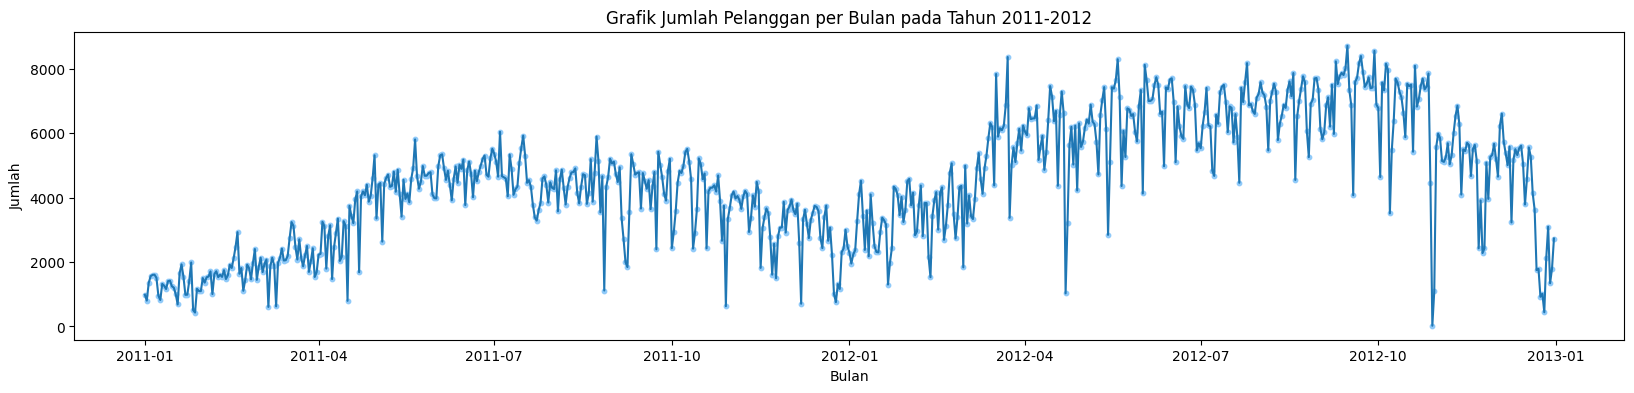

In [ ]:
# mmebuat figure dengan ukuran (20, 5)
plt.figure(figsize=(20, 4))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = data_day['count_cr'].groupby(data_day['dteday']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2011-2012')

# menampilkan plot
plt.show()

**insight:**

Berdasarkan visualisasi di atas, kita dapat disimpulkan bahwa jumlah penyewa sepeda terbanyak terjadi pada bulan September 2012. Selain itu, kita juga dapat melihat adanya penurunan jumlah penyewa sepeda yang cukup signifikan pada bulan Mei, November, dan Desember.

 ### Pertanyaan 2 : pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit ?

In [ ]:
# melakukan grouping terhadap hours dan count_cr
sum_order = data_hour.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()


<ipython-input-88-ccca3714dab2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-88-ccca3714dab2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])


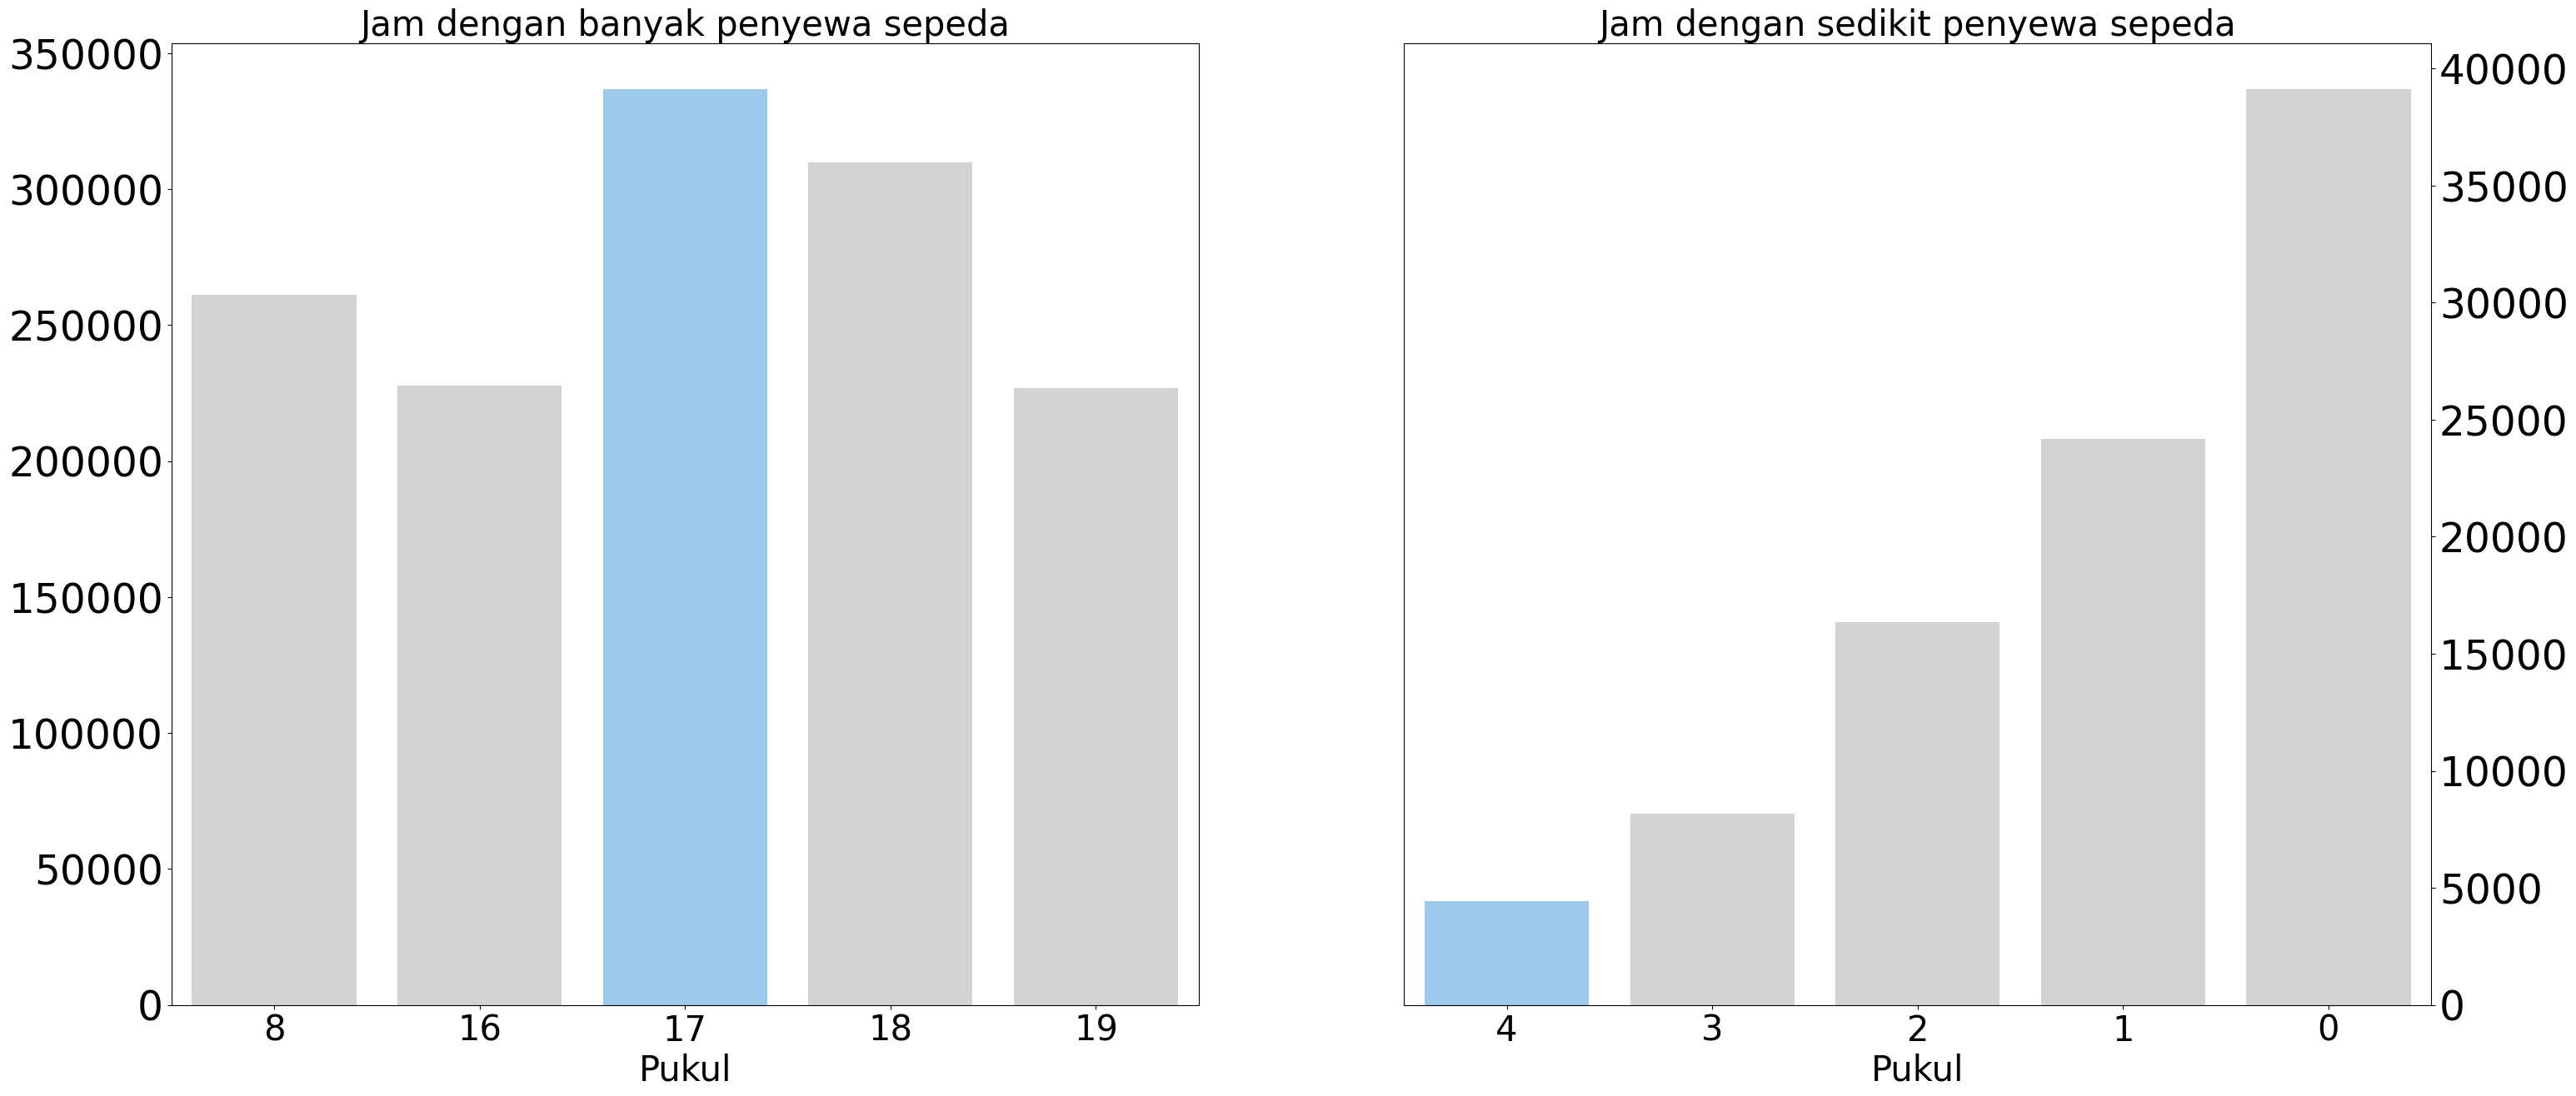

In [ ]:
# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hours", y="count_cr", data=sum_order.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Pukul", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hours", y="count_cr", data=sum_order.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])

# mengatur label dan judul untuk subplot pertama
ax[1].set_ylabel(None)
ax[1].set_xlabel("Pukul",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()

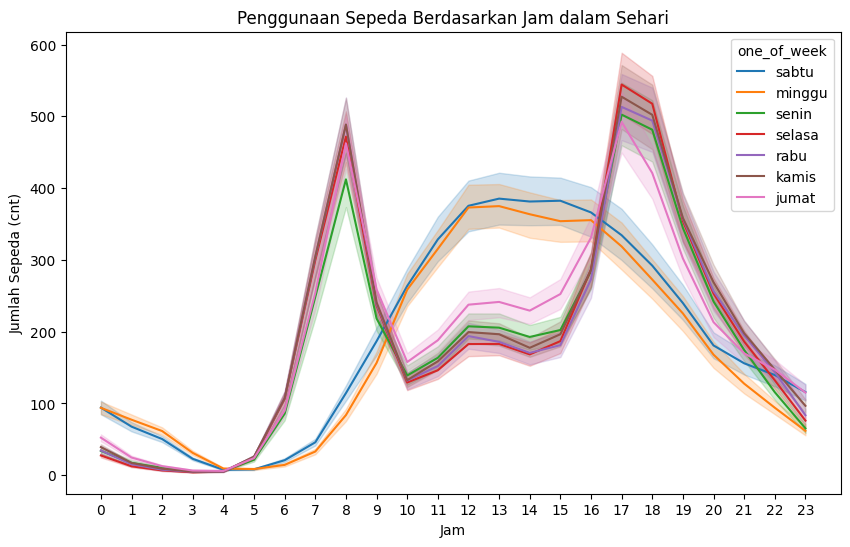

In [ ]:
# Visualisasi penggunaan sepeda berdasarkan jam dalam sehari
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_hour, x='hours', y='count_cr', hue='one_of_week', palette='tab10')
plt.title('Penggunaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda (cnt)')
plt.xticks(np.arange(0, 24, 1))
plt.show()


**insight:**

Grafik  disimpulkan bahwa penggunaan sepeda tertinggi terjadi pada sore hari pukul 17.00 dan pagi hari pukul 08.00 menandakan adanya dua puncak waktu penggunaan sepeda yang signifikan dan pukul 4 merupakan jumlah terdikit di setiap hari.

### Pertanyaan 3 : pada musim apa penyewaan sepeda paling banyak?

<ipython-input-76-08f72017b953>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


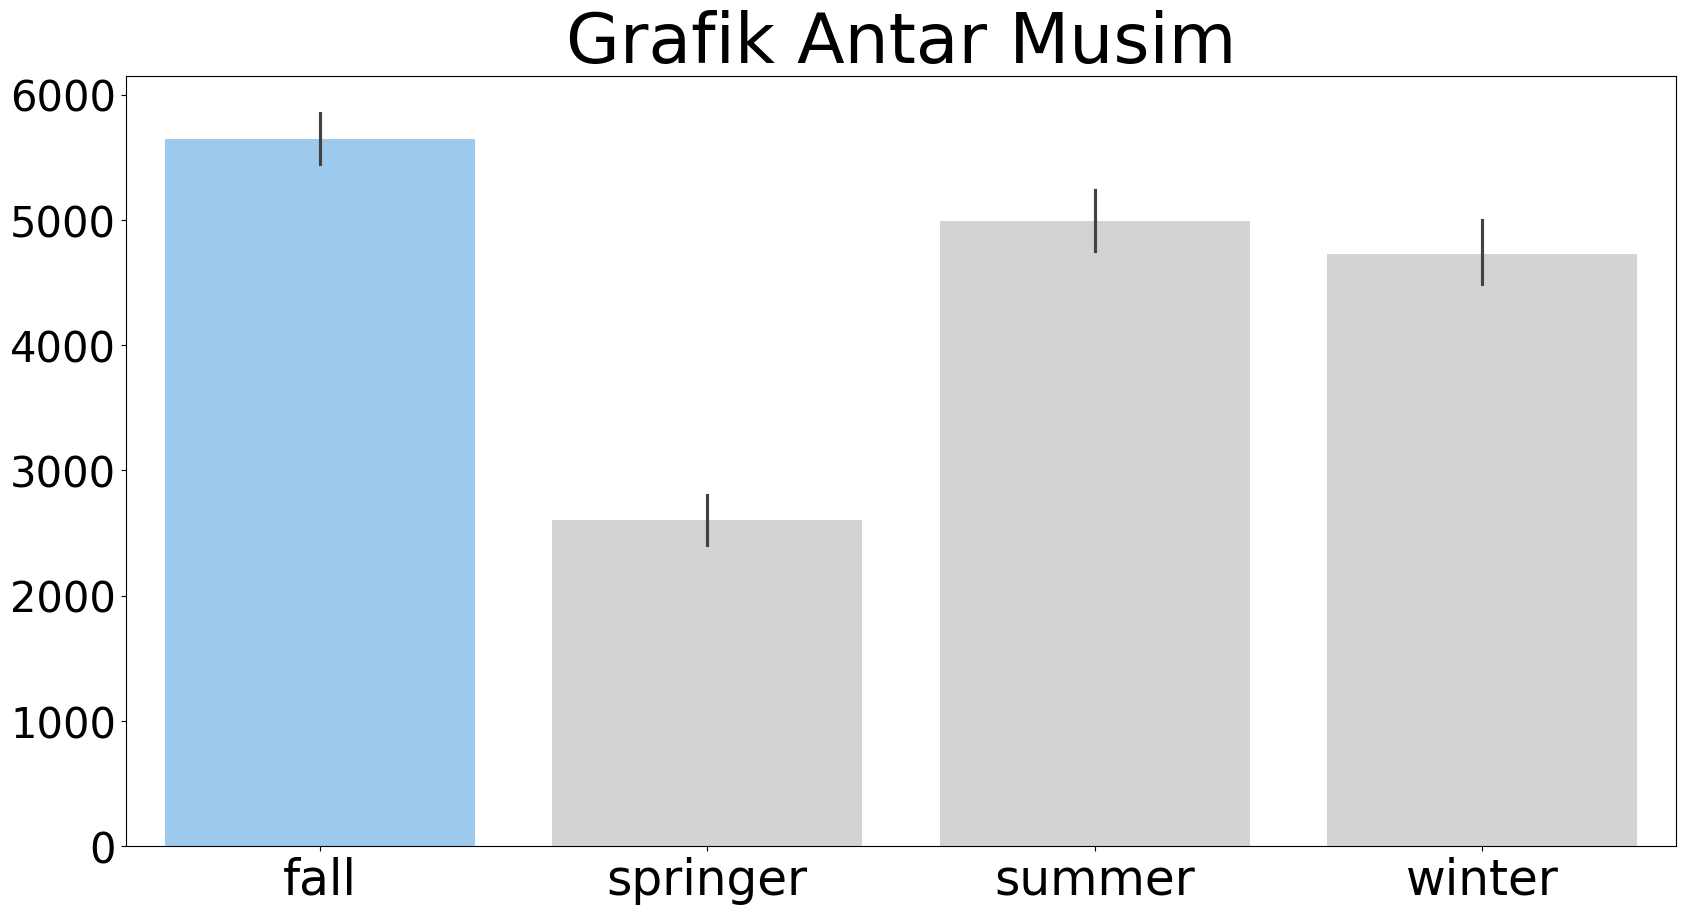

In [ ]:
# mengatur warna
colors = ["#90CAF9","#D3D3D3", "#D3D3D3", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr",
        x="season",
        data=data_day.sort_values(by="season", ascending=True),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()


**Insight:**
Musim yang paling banyak disewa ialah pada musim Fall (musim gugur) dengan total penyewaan pada musim gugur sebanyak 1061129 penyewaan sepeda

### pertanyaan 4 :Perbandingan Customer Registered dengan casual

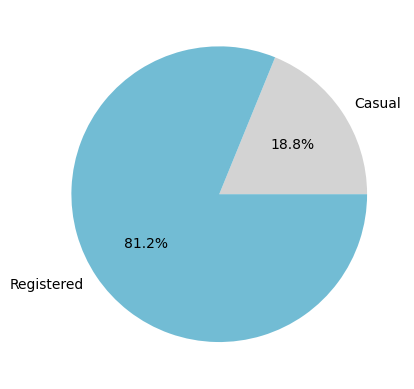

In [ ]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(data_day['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(data_day['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

**Insight:**

Penyewa sepeda yang sudah registered sebanyak 81.2% sedangkan penyewa sepeda yang belum melakukan regsitered (casual) sebanyak 18.8%

### Pertanyaan 5: Seberapa besar dampak humadity terhadap keputusan pengguna untuk menggunakan sepeda?

> Add blockquote



<ipython-input-22-79eb6eff55d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='humidity_category', y='count_cr', data=data_hour, palette='viridis')


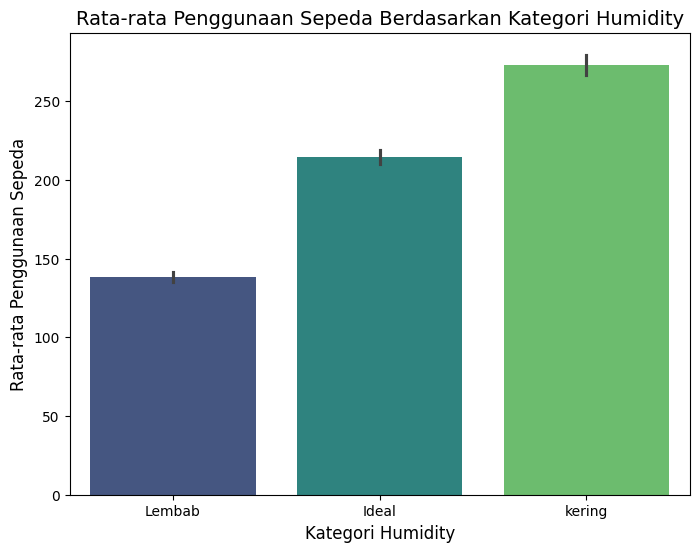

In [22]:
# Membuat grafik
plt.figure(figsize=(8, 6))
sns.barplot(x='humidity_category', y='count_cr', data=data_hour, palette='viridis')

# Menambahkan judul dan label
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Kategori Humidity', fontsize=14)
plt.xlabel('Kategori Humidity', fontsize=12)
plt.ylabel('Rata-rata Penggunaan Sepeda', fontsize=12)

# Tampilkan grafik
plt.show()

**insight:**

kita dapat mengidentifikasi kelompok pengguna menyewa sepeda pada humidity terlalu lembab pada musim panas

## Conclusion

- **Conclution pertanyaan 1** : jumlah penyewa sepeda terbanyak terjadi pada bulan September 2012. Selain itu, kita juga dapat melihat adanya penurunan jumlah penyewa sepeda yang cukup signifikan pada bulan Mei, November, dan Desember.
- **Conclution pertanyaan 2** : penggunaan sepeda tertinggi terjadi pada sore hari pukul 17.00 dan pagi hari pukul 08.00 menandakan adanya dua puncak waktu penggunaan sepeda yang signifikan dan pukul 4 merupakan jumlah terdikit di setiap hari.
- **Conclution pertanyaan 3** : Musim yang paling banyak disewa ialah pada musim Fall (musim gugur) dengan total penyewaan pada musim gugur sebanyak 1061129 penyewaan sepeda
- Conclution pertanyaan 4 : Penyewa sepeda yang sudah registered sebanyak 81.2% sedangkan penyewa sepeda yang belum melakukan regsitered (casual) sebanyak 18.8%
- **Conclution pertanyaan 5** :
kita dapat mengidentifikasi kelompok pengguna menyewa sepeda pada humidity terlalu lembab pada musim panas

## Menerapkan teknik analisis lanjutan

### 1.Analisis Clustering

#### Total Pengguna berdasarkan Humadity

In [ ]:
# Analisis penggunaan sepeda berdasarkan kategori humidity
humidity_grouped = data_hour.groupby('humidity_category')['count_cr'].count().reset_index()

#menampilkan analisis
humidity_grouped

,humidity_category,count_cr
0,Ideal,5505
1,Lembab,8356
2,kering,3518


**insight:**

Dengan menggunakan metode clustering binning, hasil menunjukkan adanya perbedaan signifikan dalam jumlah pengguna sepeda berdasarkan kelembaman. Pengguna cenderung lebih banyak menggunakan sepeda pada kelembaman kering, menandakan preferensi terhadap kondisi musim panas.

#### Total Penyewa Sepeda berdasarkan weather_situation

In [ ]:
data_hour.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

,count_cr
weather_situation,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


**insight:**

berdasarkan metode binning hasil menunjukkan bahwa jumlah penyewa sepda berdasarkan situasi cuaca lebih banyak memilih pada situasi cuaca yang cerah
 dan misty dibandingkan heavy rainsow dan light rainsow.

### 2.RFM Analysis


RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:
* Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
* Frequency (banyaknya pelanggan dalam berinteraksi)
* Monetary (banyaknya uang yang mereka gunakan)

In [ ]:
current_date = max(data_hour['dteday'])
rfm_df = data_hour.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


In [ ]:
!pip install pipreqs
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/analisis_data_python" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/analisis_data_python/requirements.txt


In [ ]:
#menyimpan data yang sudah siap untuk analisis
data_hour.to_csv('hour_fix.csv', index=False)
data_day.to_csv('day_fix.csv', index = False)